# kaggle competition 2 
## 加载和浏览数据集
加载包

In [35]:
library(e1071)
library(caTools)
library(ROCR)
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




加载数据

In [2]:
Trainraw=read.csv("../../datas/kaggle_2_Train.csv")
Testraw=read.csv("../../datas/kaggle_2_Test.csv")
str(Trainraw)

'data.frame':	932 obs. of  16 variables:
 $ Id          : int  301 302 303 304 305 306 307 308 309 310 ...
 $ Team        : chr  "ANA" "ARI" "ATL" "BAL" ...
 $ League      : chr  "AL" "NL" "NL" "AL" ...
 $ Year        : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ RS          : int  851 819 708 667 859 706 856 709 739 778 ...
 $ RA          : int  644 674 565 773 665 759 798 774 837 898 ...
 $ W           : int  99 98 101 67 93 67 81 78 74 73 ...
 $ OBP         : num  0.341 0.346 0.331 0.309 0.345 0.321 0.338 0.33 0.321 0.337 ...
 $ SLG         : num  0.433 0.423 0.409 0.403 0.444 0.413 0.449 0.408 0.412 0.423 ...
 $ BA          : num  0.282 0.267 0.26 0.246 0.277 0.246 0.268 0.253 0.249 0.274 ...
 $ Playoffs    : int  1 1 1 0 0 0 0 0 0 0 ...
 $ RankSeason  : int  3 4 2 NA NA NA NA NA NA NA ...
 $ RankPlayoffs: int  1 4 4 NA NA NA NA NA NA NA ...
 $ G           : int  162 162 161 162 162 162 162 162 162 162 ...
 $ OOBP        : num  0.314 0.305 0.313 0.336 0.308 0.331 

分割数据集

In [3]:
set.seed(123)
split = sample.split(Trainraw$Playoffs, SplitRatio = 0.70)

In [4]:
MyTrain = subset(Trainraw, split == TRUE)
MyTest = subset(Trainraw, split == FALSE)

## 逻辑回归
### 仅使用 OBP+SLG 双变量

In [5]:
QualityLog = glm(Playoffs ~ OBP+SLG, data = MyTrain, family = binomial)
summary(QualityLog)


Call:
glm(formula = Playoffs ~ OBP + SLG, family = binomial, data = MyTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5375  -0.6251  -0.4555  -0.2974   2.4924  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -20.842      2.815  -7.404 1.32e-13 ***
OBP           52.314     12.411   4.215 2.49e-05 ***
SLG            5.188      5.360   0.968    0.333    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 601.28  on 651  degrees of freedom
Residual deviance: 528.21  on 649  degrees of freedom
AIC: 534.21

Number of Fisher Scoring iterations: 5


训练集验证及阈值筛选

In [16]:
PatoffTrain_1 = predict(QualityLog, type = "response")
summary(PatoffTrain_1)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.009426 0.077302 0.135166 0.173313 0.231542 0.749071 

In [20]:
tapply(PatoffTrain_1, MyTrain$Playoffs, mean)

0         1 
0.1526334 0.2719523

In [28]:
conf05=table(MyTrain$Playoffs,predictTrain > 0.4)
conf05

   
    FALSE TRUE
  0   514   25
  1    91   22

### 画ROC

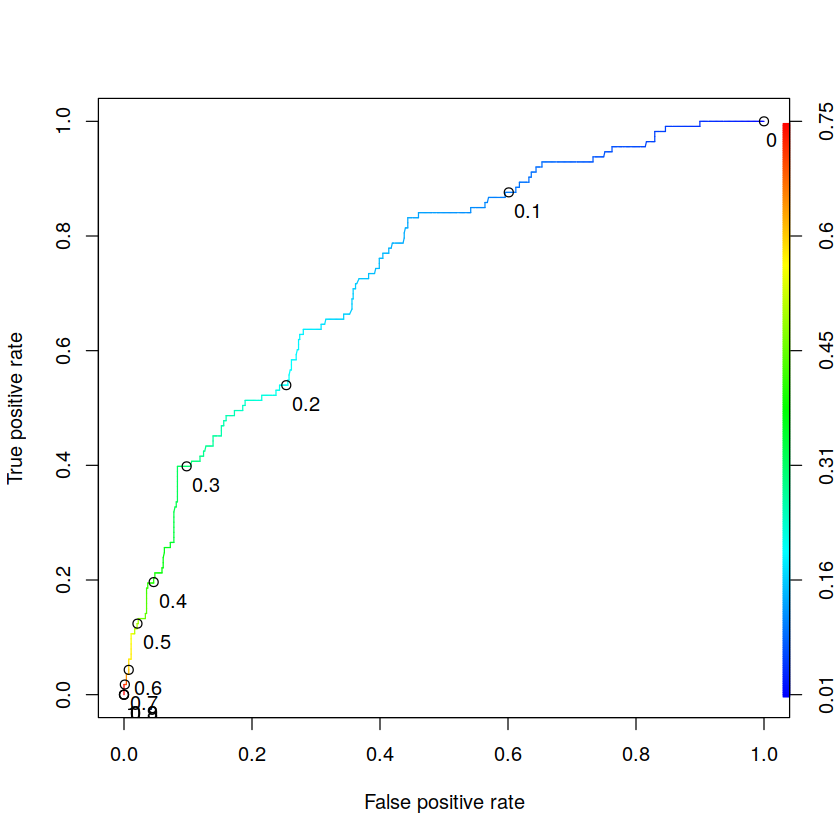

In [33]:
ROCRpred = prediction(PatoffTrain_1, MyTrain$Playoffs)
ROCRperf = performance(ROCRpred, "tpr", "fpr")
plot(ROCRperf, colorize = TRUE, print.cutoffs.at = seq(0,1,0.1), text.adj = c(-0.2,1.7))

计算AUC

In [34]:
ROCRauc = performance(ROCRpred, "auc")
ROCRauc@y.values

[[1]]
[1] 0.742427

Setting levels: control = 0, case = 1

Setting direction: controls < cases



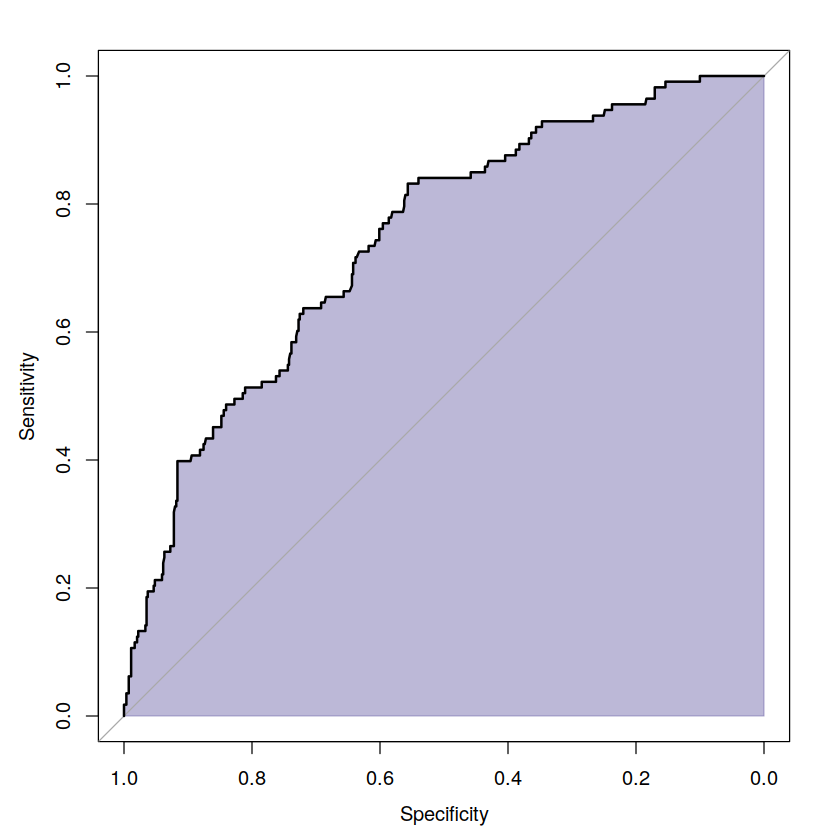

In [37]:
plot.roc(MyTrain$Playoffs, predictTrain, 
    auc.polygon = TRUE, 
    auc.polygon.col=rgb(.35,0.31,0.61, alpha = 0.4), 
    auc.polygon.border=rgb(.35,0.31,0.61, 0.4))